In [1]:
import random
import numpy as np

## 1. Task

In [2]:
SEED = 42
POP_CNT = 1000
MUTATION_RATE = 0.1
EPOCHS = 10000

random.seed(SEED)

In [3]:
def generate_pop(size: int):
    return np.random.uniform(-10, 10, [size, 2])


def parent_selection(population):
    return population[np.random.choice(population.shape[0], 2, replace=False)]


def crossover(parent1, parent2, crossover_rate=0.6):
    if random.random() < crossover_rate:
        return np.array([parent1[0], parent2[1]])
    return parent1


def mutation(individual, mutation_rate=0.1, epsilon=0.5):
    mutated_individual = individual[:]

    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] += random.uniform(-epsilon, epsilon)

    return mutated_individual

## a)

In [11]:
def ackley_function(x, y):
    return (
        3 * (1 - x) ** 2 * np.exp(-(x**2) - (y + 1) ** 2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-(x**2) - y**2)
        - 1.0 / 3 * np.exp(-((x + 1) ** 2) - y**2)
    )


def apply_func(population):
    result = np.zeros(POP_CNT)
    for i in range(population.shape[0]):
        el = population[i]
        result[i] = ackley_function(el[0], el[1])

    return result

In [12]:
def process_algo():
    population = generate_pop(POP_CNT)
    applied_func = apply_func(population)

    max_value = np.max(applied_func)
    max_child = None

    for _ in range(EPOCHS):
        parents = parent_selection(population)

        crossover_individ = crossover(parents[0], parents[1], crossover_rate=0.5)
        mutated_individual = mutation(crossover_individ, mutation_rate=0.4, epsilon=0.1)
        f_mutated = ackley_function(mutated_individual[0], mutated_individual[1])

        if f_mutated > max_value:
            max_value = f_mutated
            max_child = mutated_individual.copy()

        worst_idx = np.argmin(applied_func)

        if applied_func[worst_idx] < f_mutated:
            population[worst_idx] = mutated_individual
            applied_func[worst_idx] = f_mutated

    return max_value, max_child

In [13]:
max_value, max_child = process_algo()
print(f"{max_child} with {max_value}")

[-0.01629217  1.58357993] with 8.105730181650872


### b)

In [14]:
def b_function(x, y):
    return (
        -0.0001
        * (
            np.abs(
                np.sin(x)
                * np.sin(y)
                * np.exp(np.abs(100 - np.sqrt(x**2 + y**2) / np.pi))
            )
            + 1
        )
        ** 0.1
    )


def apply_func(population):
    result = np.zeros(POP_CNT)
    for i in range(population.shape[0]):
        el = population[i]
        result[i] = b_function(el[0], el[1])

    return result

In [17]:
def process_algo_b():
    population = generate_pop(POP_CNT)
    applied_func = apply_func(population)

    parents = parent_selection(population)
    min_value = np.min(applied_func)
    min_child = None

    for _ in range(EPOCHS):
        parents = parent_selection(population)

        crossover_individ = crossover(parents[0], parents[1], crossover_rate=0.5)
        mutated_individual = mutation(crossover_individ, mutation_rate=0.4, epsilon=0.1)
        f_mutated = b_function(mutated_individual[0], mutated_individual[1])

        if f_mutated < min_value:
            min_value = f_mutated
            min_child = mutated_individual.copy()

        worst_idx = np.argmax(applied_func)

        if applied_func[worst_idx] > f_mutated:
            population[worst_idx] = mutated_individual
            applied_func[worst_idx] = f_mutated

    return min_value, min_child

In [18]:
min_value, min_chel = process_algo_b()

print(f"{min_chel} with {min_value}")

[-1.35009955 -1.3500876 ] with -2.062611768555242


## 2

In [19]:
n = 3
POP_CNT = 500
EPOCHS = 5000
times = 2

In [31]:
class Element:
    def __init__(self, x):
        self.x = x
        self.func = self.calculate_func()
        self.list_dominated = []
        self.num_dominating = 0
        self.distance = 0
        self.rank = 0


    def calculate_func(self):
        f_1, f_2 = -1, -1

        for i in range(n):
            f_1 *= np.exp(-1 * ((self.x[i] - 1 / np.sqrt(n)) ** 2))
            f_2 *= np.exp(-1 * ((self.x[i] + 1 / np.sqrt(n)) ** 2))

        f_1 += 1
        f_2 += 1

        return f_1, f_2



In [32]:
def generate_population(size: int):
    res = []
    for i in range(size):
        nums = [np.random.uniform(-4, 4) for _ in range(n)]
        res.append(Element(nums))
    return res

In [33]:
def CheckDominates(individual_1: Element, individual_2: Element) -> bool:
    f1_1, f2_1 = individual_1.func
    f1_2, f2_2 = individual_2.func
    return (f1_1 <= f1_2 and f2_1 <= f2_2) and (f1_1 < f1_2 or f2_1 < f2_2)

In [34]:
def non_dominated_sort(arr_element: list[Element]):
    S = [[] for _ in range(len(arr_element))]
    front = [[]]
    n = [0] * len(arr_element)
    rank = [0] * len(arr_element)

    for p in range(len(arr_element)):
        S[p] = []
        n[p] = 0
        for q in range(len(arr_element)):
            if CheckDominates(arr_element[p], arr_element[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif CheckDominates(arr_element[q], arr_element[p]):
                n[p] += 1
        if n[p] == 0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while front[i]:
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i + 1
                    if q not in Q:
                        Q.append(q)
        i += 1
        front.append(Q)

    del front[len(front) - 1]
    fronts = {}
    for i in range(len(front)):
        fronts[i] = [arr_element[p] for p in front[i]]
        for el in fronts[i]:
            el.rank = i
    return fronts

In [35]:
def crowding_distance(arr_elements: list[Element]):
    front_size = len(arr_elements)

    for i in range(2):
        arr_elements.sort(key=lambda el: el.func[i])
        arr_elements[0].distance = np.inf
        arr_elements[front_size - 1].distance = np.inf
        f_max = arr_elements[front_size - 1].func[i]
        f_min = arr_elements[0].func[i]
        for j in range(1, front_size - 1):
            arr_elements[j].distance += (
                arr_elements[j + 1].func[i] - arr_elements[j - 1].func[i]
            ) / (f_max - f_min)

    return sorted(arr_elements, key=lambda el: el.distance, reverse=True)

In [36]:
def tournament(population: list[Element], taken_percent: float = 0.1):
    participants_cnt = int(len(population) * taken_percent)
    participants = np.random.choice(population, size=participants_cnt, replace=False)

    sorted_by_rank = sorted(participants, key=lambda el: (el.rank, -el.distance))
    return sorted_by_rank[0]


def Select_parents(population: list[Element], taken_percent: float = 0.3):
    parent_1, parent_2 = None, None
    iter = 0
    while (parent_1 == None or parent_1.x == parent_2.x) and (iter < 10):
        parent_1, parent_2 = tournament(population, taken_percent), tournament(
            population, taken_percent
        )
        iter += 1

    return parent_1, parent_2


def CrossOver(parents: list[Element], crossover_rate=0.6):
    new_x = parents[0].x
    if random.random() < crossover_rate:
        if random.randint(1, 2) == 1:
            new_x = [parents[0].x[0], parents[1].x[1], parents[1].x[2]]
        else:
            new_x = [parents[0].x[0], parents[0].x[1], parents[1].x[2]]
        np.random.shuffle(new_x)
    return Element(new_x)


def Mutation(cross_res: Element, mutation_rate=0.1, eps: float = 0.1):
    for i in range(len(cross_res.x)):
        if random.random() < mutation_rate:
            cross_res.x[i] += random.uniform(-eps, eps)

    return cross_res


def NewPopulation(population: list[Element]) -> list[Element]:
    new_population = population[:]
    for i in range(EPOCHS):
        parents = Select_parents(new_population)
        cross_res = CrossOver(parents)
        mut_res = Mutation(cross_res)

        new_population.sort(key=lambda el: (el.rank, -el.distance))
        worst = new_population[-1]
        if mut_res.rank < worst.rank or (
            mut_res.rank == worst.rank and mut_res.distance < worst.distance
        ):
            new_population[-1] = mut_res
    return new_population


def Inital(p_0: list[Element]):
    non_dominated_sort(p_0)
    return NewPopulation(p_0)

In [37]:
def NSGA_2():
    p_t = generate_population(POP_CNT)
    q_t = Inital(p_t)

    for i in range(times):
        r_t = p_t + q_t
        for obj in r_t:
            obj.distance = 0
            obj.num_dominating = 0
            obj.rank = 0
            obj.list_dominated = []

        fronts = non_dominated_sort(r_t)
        p_t_1 = []
        j = 0

        while len(p_t_1) + len(fronts[j]) <= POP_CNT:
            crowding_distance(fronts[j])
            p_t_1 += fronts[j]
            j += 1

        sorted_fi = crowding_distance(fronts[j])
        p_t_1 += sorted_fi[: POP_CNT - len(p_t_1)]
        q_t_1 = NewPopulation(p_t_1)

        p_t = p_t_1
        q_t = q_t_1

    sorted_population = non_dominated_sort(p_t)
    return sorted_population[0]

In [ ]:
result = NSGA_2()

In [39]:
result[0].x

[-0.13809177264544342, -0.030450345013311633, 0.23454901778950152]

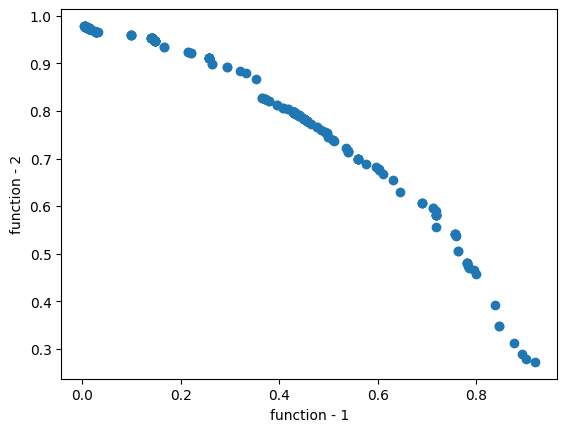

In [42]:
import matplotlib.pyplot as plt

x = []
y = []
for el in result:
    x.append(el.func[0])
    y.append(el.func[1])
plt.xlabel("function - 1")
plt.ylabel("function - 2")
plt.scatter(x, y)

## 3

In [ ]:
distance_matrix = [
      [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
      [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
      [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
      [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
      [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
      [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
      [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
      [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
      [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
      [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
      [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
      [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
      [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
      [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
      [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
      [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
      [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
    ] #(in km)
flower_market_id = 0
demands = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]

# max  grade 8
num_couriers = 4
salary_per_km = 100
courier_max_load = [2500, 2000, 1000, 500]

In [ ]:
len(distance_matrix[0])
len(demands)

17